# LVM Guide Star Catalog using the new library

In [1]:
import lvmguiding
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from astropy.coordinates import SkyCoord
from importlib import reload
from matplotlib.colors import LogNorm

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## Create a synthetic image

In [2]:
widefield_instrument = lvmguiding.InstrumentParameters()

#widefield_instrument.chip_width=300
#widefield_instrument.pixel_width=30000

#widefield_instrument.pixel_height=30000
#widefield_instrument.chip_height=300 #10 um/pixel


widefield_instrument.chip_width=40
widefield_instrument.chip_height=40 #10 um/pixel
widefield_instrument.pixel_width=4000
widefield_instrument.pixel_height=4000

widefield_instrument.image_scale=250# microns/arcsec -> 0.04 arcsec/pixel
widefield_instrument.dark_current = 0
widefield_instrument.mag_lim_lower = 999

In [3]:
ra0  =  (13+26./60+47.24/3600)*15   #13:26:47.24
dec0 = -(47+28./60+46.45/3600)  #−47:28:46.

c = SkyCoord(ra=ra0,dec=dec0,unit="deg")

dd_x_mm,dd_y_mm,culled_cat = lvmguiding.find_guide_stars(c,pa=0,plotflag=False,return_focal_plane_coords=True,remote_catalog=True,east_is_right=False,inst=widefield_instrument)

chip_xxs = dd_x_mm#+44.5/2
chip_yys = dd_y_mm#+44.5/2 
mags = culled_cat["phot_g_mean_mag"]

INFO: Query finished. [astroquery.utils.tap.core]
Gaia query:  SELECT source_id, ra,dec,phot_g_mean_mag FROM gaiaedr3.gaia_source WHERE phot_g_mean_mag <= 999 AND 1=CONTAINS(POINT('ICRS',ra,dec), CIRCLE('ICRS',201.69683333333333,-47.479569444444444, 0.692887394120578))
314003 stars found within 0.692887394120578 deg


In [4]:
my_image = lvmguiding.make_synthetic_image(chip_x=chip_xxs+widefield_instrument.chip_width/2,
                                           chip_y=chip_yys+widefield_instrument.chip_width/2,
                                          gmag=mags,
                                          inst = widefield_instrument,
                                          exp_time=1000,
                                          seeing_arcsec=.4,
                                          sky_flux=0)#,
                                          #write_output="omega_cen_30k.fits")

1904 of 314003 stars are on the chip.
Nstars:  (1904,)


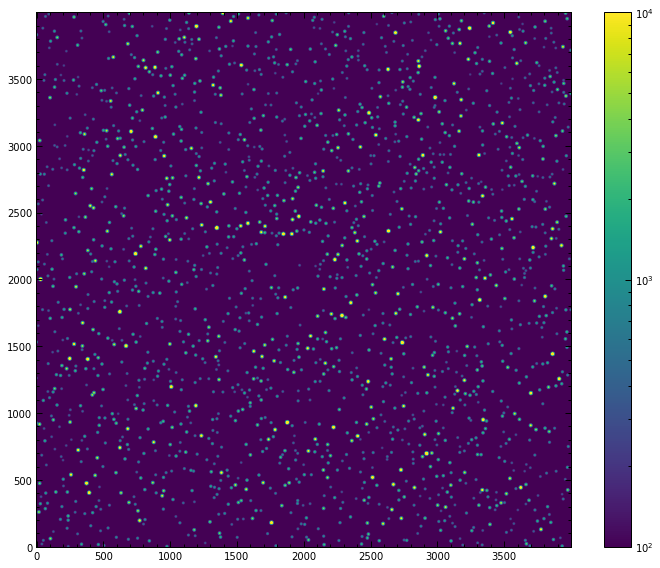

In [5]:
combined= my_image
fig,ax4 = plt.subplots(figsize=(12,8))

#vmin4 = np.percentile(combined,25)
#vmax4 = np.percentile(combined,99.5)

my_plot4 = ax4.imshow(combined,origin="lower",norm=LogNorm(100,10000))#vmin=np.max([vmin4,1]), vmax=vmax4))


#if np.sum(sn>5) < 10:
#    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\nWhite circle around all stars with S/N > 5 (N = {})".format(np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000),np.sum(sn>5)))
#    ax4.plot(x_position[sn>5],y_position[sn>5],"o",ms=40,markerfacecolor="none",markeredgecolor="w",label="gmag < 12")
#else:
#    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nPointing: {}  Texp: {} s\n{} of {} stars have a S/N > 5\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\n".format(pointing_string,exp_time,np.sum(sn>5),len(gmag),np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000)))
#ax4.plot(x_position[np.argmin(gmag)],y_position[np.argmin(gmag)],"o",ms=20,markerfacecolor="none",markeredgecolor="r",label="gmag < 12")
plt.colorbar(my_plot4,ax=ax4,fraction=0.046, pad=0.04)
#plt.colorbar(my_plot4,ax=ax,fraction=0.046, pad=0.04)
#ax4.legend()

fig.tight_layout()

#filename = "/home/haeberle/exchange/lvm/report/pointing_"+pointing_string+"_{:d}ms.png".format(int(1000*exp_time))
#fig.suptitle()
#fig.savefig("/home/haeberle/exchange/lvm/report/example_crowded_field.png",dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white")
#fig.savefig(filename,dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white") 